<a href="https://colab.research.google.com/github/catalinamedran/Entrega1/blob/main/Entrega1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Proyecto Final - Visualizaciones en Python

### Primera Entrega  
Archivo: ProyectoDS_Parte1_Medran_C

---

##📌 *Abstract*

Este proyecto utiliza el dataset “Spotify Analysis Dataset 2025” proveniente de Kaggle, que contiene información de usuarios de la plataforma de música Spotify. Cada registro corresponde a un usuario e incluye datos demográficos (edad, género, país), características de uso (tiempo de escucha, canciones reproducidas por día, porcentaje de canciones saltadas, minutos de escucha offline, anuncios escuchados) y tipo de suscripción (Free, Premium, Family, Student). La base de datos también incorpora la variable objetivo is_churned, que indica si el usuario canceló o mantuvo su suscripción.

El objetivo del proyecto es explorar el comportamiento de los usuarios de Spotify desde una perspectiva descriptiva y visual, identificando patrones de uso, diferencias entre tipos de suscripción y posibles factores asociados a la cancelación del servicio. Para ello se aplican técnicas de análisis univariado, bivariado y multivariado, utilizando herramientas como pandas, Matplotlib y Seaborn.

El análisis comienza con una revisión de la calidad de los datos y detección de valores faltantes, seguido de visualizaciones que permiten responder preguntas clave sobre la distribución de variables, correlaciones y contrastes entre usuarios que se dieron de baja y los que permanecen activos. Este estudio exploratorio permitirá sentar las bases para análisis posteriores orientados a la predicción de cancelaciones de suscripción y la toma de decisiones estratégicas para mejorar la retención de usuarios.


##❓*Preguntas de interés*


1. ¿Cómo se distribuye el tiempo de escucha diario de los usuarios de Spotify?
2. ¿Existe relación entre el tipo de suscripción y la probabilidad de cancelación de suscripción?
3. ¿Cómo se relacionan el número de canciones reproducidas por día, el porcentaje de canciones saltadas y la cancelación de suscripciones de los usuarios?



## 🎯*Objetivo del proyecto*
El objetivo de este proyecto es explorar el comportamiento de los usuarios de Spotify y analizar los factores que pueden influir en la cancelación de su suscripción (churn). Se busca identificar patrones de uso y diferencias entre tipos de suscripción, características demográficas y hábitos de escucha, utilizando visualizaciones univariadas, bivariadas y multivariadas. Este análisis descriptivo permitirá comprender mejor qué variables están asociadas al churn y sentará las bases para futuros trabajos de predicción de cancelaciones, segmentación de usuarios y optimización de estrategias de retención en la plataforma.

##📊*Visualizaciones y Análisis*

In [1]:
# Librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Cargar base de datos
path_base = "https://raw.githubusercontent.com/catalinamedran/Entrega1/refs/heads/main/Datasets/spotify_churn_dataset.csv"
df = pd.read_csv(path_base)
df.head()

,user_id,gender,age,country,subscription_type,listening_time,songs_played_per_day,skip_rate,device_type,ads_listened_per_week,offline_listening,is_churned
0,1,Female,54,CA,Free,26,23,0.20,Desktop,31,0,1
1,2,Other,33,DE,Family,141,62,0.34,Web,0,1,0
2,3,Male,38,AU,Premium,199,38,0.04,Mobile,0,1,1
3,4,Female,22,CA,Student,36,2,0.31,Mobile,0,1,0
4,5,Other,29,US,Family,250,57,0.36,Mobile,0,1,1


In [5]:
# Cantidad de valores faltantes por columna
missing = df.isna().sum().sort_values(ascending=False)
# Mostrar solo las columnas que tienen al menos un valor faltante
missing[missing > 0]


,0


👉 No se observan valores faltantes en las columnas del dataset

##📈*1. Análisis univariado*
Distribución del tiempo de escucha diario de los usuarios de Spotify

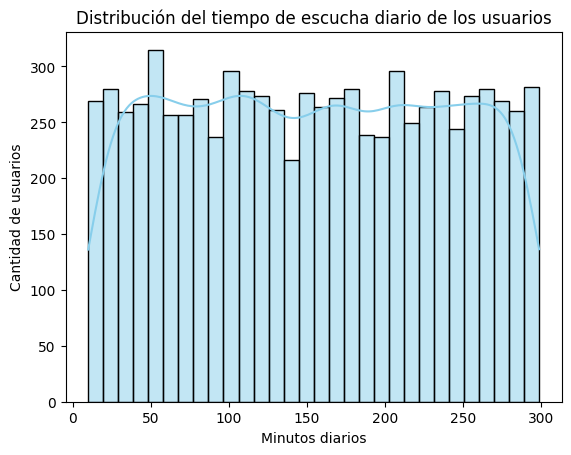

In [6]:
# Histograma + KDE de listening_time
sns.histplot(df["listening_time"], kde=True, bins=30, color="skyblue")
plt.title("Distribución del tiempo de escucha diario de los usuarios")
plt.xlabel("Minutos diarios")
plt.ylabel("Cantidad de usuarios")
plt.show()


##📈*2. Análisis bivariado*
Relación entre el tipo de suscripción y probabilidad de cancelación

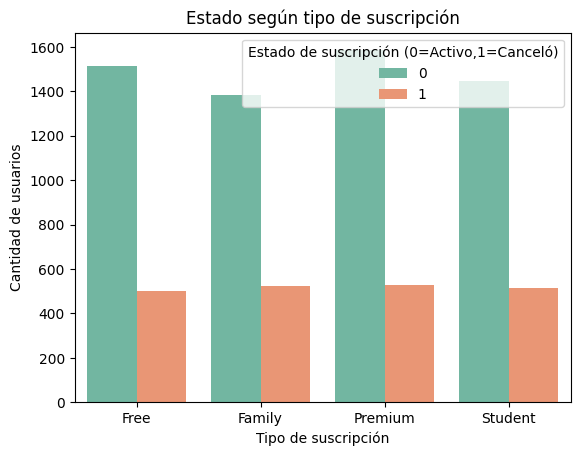

In [8]:
# Countplot de suscripción vs probabilidad de cancelación
sns.countplot(x="subscription_type", hue="is_churned", data=df, palette="Set2")
plt.title("Estado según tipo de suscripción")
plt.xlabel("Tipo de suscripción")
plt.ylabel("Cantidad de usuarios")
plt.legend(title="Estado de suscripción (0=Activo,1=Canceló)")
plt.show()

##📈*3. Análisis multivariado*
Relación entre la probabilidad promedio de cancelación según cuartiles de canciones reproducidas por día y cuartiles de tasa de salto de canciones

/tmp/ipython-input-570607135.py:2: FutureWarning: The default value of observed=False is deprecated and will change to observed=True in a future version of pandas. Specify observed=False to silence this warning and retain the current behavior
  pivot = df.pivot_table(


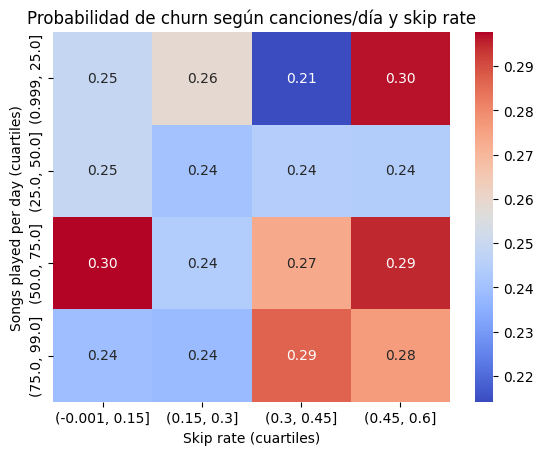

In [13]:
# Creación de tabla pivot
pivot = df.pivot_table(
    index=pd.qcut(df['songs_played_per_day'], 4),
    columns=pd.qcut(df['skip_rate'], 4),
    values='is_churned',
    aggfunc='mean'
)

# Heatmap
sns.heatmap(pivot, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Probabilidad de churn según canciones/día y skip rate")
plt.xlabel("Skip rate (cuartiles)")
plt.ylabel("Songs played per day (cuartiles)")
plt.show()


##✅*Conclusiones preliminares*


1. En el análisis univariado de tiempo de escucha diario, se observa que los usuarios de Spotify presentan una distribución relativamente uniforme en sus minutos diarios de escucha, con pocos casos extremos. Esto indica que, en general, no hay un grupo dominante de usuarios que escuche significativamente más o menos que el resto.
2.   Elemento de lista



##*Outliers Detection con IQR*

In [17]:
original_size = df.shape[0]
print(f"Tamaño original del dataset: {original_size}")

Tamaño original del dataset: 8000


In [16]:
# Columnas numéricas a analizar
numeric_cols = [
    'age',
    'listening_time',
    'songs_played_per_day',
    'skip_rate',
    'ads_listened_per_week',
    'offline_listening'
]
report = []

df_clean = df.copy()  # Copia para limpiar sin perder original

for col in numeric_cols:
    original_size = df_clean.shape[0]

    Q1 = df_clean[col].quantile(0.25)
    Q3 = df_clean[col].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Filtrar outliers
    df_clean = df_clean[(df_clean[col] >= lower_bound) & (df_clean[col] <= upper_bound)]

    iqr_size = df_clean.shape[0]
    iqr_removed = original_size - iqr_size

    report.append({
        'Columna': col,
        'Tamaño original': original_size,
        'Tamaño final': iqr_size,
        'Registros eliminados': iqr_removed,
        'Porcentaje eliminado (%)': round(100 * iqr_removed / original_size, 2)
    })

# Mostrar reporte
report_df = pd.DataFrame(report)
print(report_df)
print(f"\nTamaño final del dataset limpio: {df_clean.shape[0]}")

                 Columna  Tamaño original  Tamaño final  Registros eliminados  \
0                    age             8000          8000                     0   
1         listening_time             8000          8000                     0   
2   songs_played_per_day             8000          8000                     0   
3              skip_rate             8000          8000                     0   
4  ads_listened_per_week             8000          6317                  1683   
5      offline_listening             6317          5982                   335   

   Porcentaje eliminado (%)  
0                      0.00  
1                      0.00  
2                      0.00  
3                      0.00  
4                     21.04  
5                      5.30  

Tamaño final del dataset limpio: 5982
